In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('ggplot')

%matplotlib inline

## Importing the datasets

In [28]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

In [30]:
df_parcels = pd.read_csv('datasets/parcels.csv')

In [31]:
df_characteristics = pd.read_csv('datasets/real_property_residential_characteristics.csv', error_bad_lines=False)

Skipping line 63332: expected 46 fields, saw 47
Skipping line 63335: expected 46 fields, saw 47
Skipping line 63338: expected 46 fields, saw 47

Skipping line 68348: expected 46 fields, saw 48
Skipping line 69469: expected 46 fields, saw 47
Skipping line 69470: expected 46 fields, saw 47
Skipping line 69471: expected 46 fields, saw 47
Skipping line 69472: expected 46 fields, saw 47



## Filtering the data to only show single family homes

In [29]:
df_sales = df_sales[df_sales.D_CLASS == '113']

In [13]:
df_parcels = df_parcels[df_parcels.D_CLASS == '113']

In [36]:
df_characteristics = df_characteristics[df_characteristics.D_CLASS_CN == 'SINGLE FAMILY']

## Looking at summary statistics and the basic shape of the data

### *df_parcels* AKA: the dataset with the basic info on each parcel

In [21]:
df_parcels.shape

(84680, 34)

In [5]:
df_parcels.describe()

,PIN,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,OWNER_ADDRESS_LINE2,OWNER_STR_NAME_PRE_MOD,OWNER_STR_NAME_PRE_TYPE,SITUS_ADDRESS_ID,...,IMPROVEMENTS,PROP_CLASS,TOTAL_VALUE,LAND,DCL12,IMP_AREA,CCYRBLT,SALE_MONTHDAY,SALE_YEAR,SALE_PRICE
count,2.255550e+05,2.255550e+05,179513.000000,179513.000000,179513.000000,179513.000000,0.0,0.0,0.0,211402.000000,...,2.233430e+05,223343.000000,2.233430e+05,2.246030e+05,225349.000000,2.253490e+05,215887.000000,203353.000000,203353.000000,1.529940e+05
mean,1.619300e+08,4.125926e+11,3907.742069,14.241788,23.129918,9.066001,NaN,NaN,NaN,152981.215064,...,4.966374e+04,1488.713168,5.257136e+05,1.607455e+04,12.934777,2.257300e+03,1891.049461,639.559825,2007.344298,4.929400e+05
std,1.020637e+06,2.236647e+11,2229.960029,10.443368,41.752304,94.707581,NaN,NaN,NaN,122286.285356,...,8.704510e+05,1617.235897,3.727943e+06,3.135757e+05,8.287809,1.869593e+04,358.652593,333.224070,12.182468,4.423821e+06
min,1.600890e+08,1.100001e+09,11.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,0.000000,...,0.000000e+00,100.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,101.000000,104.000000,1.000000e+00
25%,1.610965e+08,2.253160e+11,2194.000000,6.000000,7.000000,0.000000,NaN,NaN,NaN,59668.250000,...,7.618000e+03,1112.000000,1.654000e+05,2.800000e+03,11.000000,8.400000e+02,1930.000000,330.000000,2003.000000,7.150000e+04
50%,1.617328e+08,5.072160e+11,5065.000000,12.000000,15.000000,0.000000,NaN,NaN,NaN,119502.500000,...,1.248100e+04,1112.000000,2.678000e+05,6.000000e+03,11.000000,1.142000e+03,1956.000000,620.000000,2009.000000,1.874750e+05
75%,1.628061e+08,5.351150e+11,5291.000000,21.000000,25.000000,0.000000,NaN,NaN,NaN,191168.500000,...,2.128500e+04,1130.000000,4.201000e+05,7.380000e+03,11.000000,1.660000e+03,1981.000000,917.000000,2013.000000,3.460000e+05
max,1.640972e+08,1.408200e+12,14082.000000,67.000000,932.000000,999.000000,NaN,NaN,NaN,528900.000000,...,1.668824e+08,9949.000000,5.856697e+08,2.794056e+07,99.000000,5.103242e+06,2016.000000,1231.000000,2016.000000,3.875000e+08


In [22]:
df_parcels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84680 entries, 24 to 225554
Data columns (total 62 columns):
PIN                         84680 non-null int64
SCHEDNUM                    84680 non-null int64
MAPNUM                      84653 non-null float64
BLKNUM                      84653 non-null float64
PARCELNUM                   84653 non-null float64
APPENDAGE                   84653 non-null float64
PARCEL_SOURCE               81689 non-null object
SYSTEM_START_DATE           84680 non-null object
OWNER_NAME                  84660 non-null object
OWNER_ADDRESS_LINE1         84660 non-null object
OWNER_ADDRESS_LINE2         0 non-null float64
OWNER_ADDR_NBR_PREFIX       0 non-null object
OWNER_ADDR_NBR              84659 non-null object
OWNER_ADDR_NBR_SUFFIX       12 non-null object
OWNER_STR_NAME_PRE_MOD      0 non-null float64
OWNER_STR_NAME_PRE_DIR      43821 non-null object
OWNER_STR_NAME_PRE_TYPE     0 non-null float64
OWNER_STR_NAME              84660 non-null object
OWN

### *df_sales* AKA: the dataset with the home sales info

In [23]:
df_sales.shape

(74221, 16)

In [24]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 38 to 234014
Data columns (total 16 columns):
SCHEDNUM          74221 non-null int64
RECEPTION_NUM     74221 non-null object
INSTRUMENT        74221 non-null object
SALE_YEAR         74221 non-null int64
SALE_MONTHDAY     74221 non-null int64
RECEPTION_DATE    74221 non-null int64
SALE_PRICE        49205 non-null float64
GRANTOR           74221 non-null object
GRANTEE           74221 non-null object
CLASS             74221 non-null object
MKT_CLUS          74212 non-null float64
D_CLASS           74221 non-null object
D_CLASS_CN        74221 non-null object
NBHD_1            74221 non-null int64
NBHD_1_CN         74221 non-null object
PIN               74221 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 9.6+ MB


In [25]:
df_sales.describe()

,SCHEDNUM,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,MKT_CLUS,NBHD_1,PIN
count,7.422100e+04,74221.000000,74221.000000,7.422100e+04,4.920500e+04,74212.000000,74221.000000,7.422100e+04
mean,3.300750e+11,2011.727234,659.805203,2.011868e+07,3.979828e+05,14.462324,334.796068,1.615791e+08
std,2.361227e+11,2.649423,332.156548,2.652223e+04,1.774349e+06,10.052962,250.564454,9.303221e+05
min,4.100122e+09,2008.000000,101.000000,1.990081e+07,1.000000e+00,1.000000,1.000000,1.604314e+08
25%,1.165070e+11,2009.000000,407.000000,2.009110e+07,7.500000e+04,6.000000,109.000000,1.607881e+08
50%,2.351300e+11,2012.000000,627.000000,2.012051e+07,1.805000e+05,13.000000,259.000000,1.614388e+08
75%,5.233060e+11,2014.000000,923.000000,2.014091e+07,2.910000e+05,23.000000,541.000000,1.619761e+08
max,9.131140e+11,2016.000000,1231.000000,2.016091e+07,3.350000e+07,56.000000,906.000000,1.640949e+08


In [34]:
df_sales.D_CLASS_CN.value_counts()

SINGLE FAMILY    74221
Name: D_CLASS_CN, dtype: int64

### df_characteristics AKA the dataset with the characteristics of the property

In [37]:
df_characteristics.shape

(131640, 46)

In [38]:
df_characteristics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131640 entries, 0 to 199731
Data columns (total 46 columns):
PIN                 131640 non-null int64
SCHEDNUM            131640 non-null int64
CD                  131640 non-null int64
OFCARD              131640 non-null int64
OWNER               131640 non-null object
CO_OWNER            2651 non-null object
OWNER_NUM           131640 non-null object
OWNER_DIR           70057 non-null object
OWNER_ST            131640 non-null object
OWNER_TYPE          128336 non-null object
OWNER_APT           4717 non-null object
OWNER_CITY          131640 non-null object
OWNER_STATE         131639 non-null object
OWNER_ZIP           131634 non-null object
SITE_NBR            131640 non-null int64
SITE_DIR            74512 non-null object
SITE_NAME           131640 non-null object
SITE_MODE           131597 non-null object
SITE_MORE           1666 non-null object
TAX_DIST            131640 non-null object
PROP_CLASS          131639 non-null float6

In [39]:
df_characteristics.describe()

,PIN,SCHEDNUM,CD,OFCARD,SITE_NBR,PROP_CLASS,LAND_SQFT,AREA_ABG,BSMT_AREA,FBSMT_SQFT,...,CCYRBLT,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1
count,1.316400e+05,1.316400e+05,131640.0,131640.000000,131640.000000,131639.000000,131623.000000,131640.000000,131640.000000,131640.000000,...,131625.000000,131625.000000,131640.000000,1.316390e+05,1.316390e+05,131639.000000,131639.000000,131639.000000,131639.000000,131640.000000
mean,1.615375e+08,3.943676e+11,1.0,1.002978,3600.228851,1139.693791,6887.373651,1489.297129,671.045943,380.999218,...,1951.716862,617.746294,1.027925,1.549733e+05,3.592385e+05,12339.774087,28602.434529,28502.675651,100.683019,403.264304
std,8.285440e+05,2.274046e+11,0.0,0.094791,3840.690532,473.359897,3670.260932,782.577253,552.215525,475.986018,...,32.779802,925.027109,0.285891,1.567984e+05,2.905924e+05,12491.454724,23143.031543,23101.119558,2755.915865,240.839512
min,1.604314e+08,4.100122e+09,1.0,1.000000,1.000000,1112.000000,0.000000,0.000000,0.000000,0.000000,...,1873.000000,0.000000,0.000000,0.000000e+00,3.460000e+04,0.000000,2754.000000,0.000000,0.000000,1.000000
25%,1.608711e+08,2.184110e+11,1.0,1.000000,1357.000000,1112.000000,5350.000000,974.000000,0.000000,0.000000,...,1927.000000,0.000000,1.000000,5.620000e+04,1.938000e+05,4474.000000,15426.000000,15360.000000,0.000000,205.000000
50%,1.614421e+08,5.085090e+11,1.0,1.000000,2747.000000,1112.000000,6250.000000,1245.000000,754.000000,0.000000,...,1953.000000,0.000000,1.000000,9.690000e+04,2.914000e+05,7713.000000,23196.000000,23150.000000,0.000000,520.000000
75%,1.619073e+08,5.303080e+11,1.0,1.000000,4459.000000,1112.000000,7680.000000,1764.000000,1051.000000,768.000000,...,1971.000000,1997.000000,1.000000,2.186000e+05,4.223500e+05,17401.000000,33623.000000,33580.000000,0.000000,588.000000
max,1.640952e+08,9.145050e+11,1.0,25.000000,21680.000000,9279.000000,366283.000000,18231.000000,8896.000000,7565.000000,...,2016.000000,3994.000000,10.000000,8.690200e+06,1.009460e+07,691740.000000,803530.000000,803530.000000,380430.000000,906.000000


## Looking at one property across all three datasets

In [7]:
df_sales[df_sales.SCHEDNUM == 23307028000]

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
18205,23307028000,2016099458,WD,2016,722,20160728,330000.0,"WASHINGTON,QUIANA","PHIFER,DONALD & NICOLE",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18206,23307028000,2012005557,SW,2011,1215,20120117,185000.0,NAVY FEDERAL CREDIT UNION,"WASHINGTON,QUIANA",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18207,23307028000,2010142026,QC,2010,1124,20101207,NaN,"NADOL,DAVID J & THERESE J","NADOL,THERESE J",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18208,23307028000,2011096228,PT,2011,829,20110829,NaN,"NADOL,THERESE J",NAVY FEDERAL CREDIT UNION,R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499
18209,23307028000,2015111855,QC,2015,807,20150811,1.0,"WASHINGTON,QUIANA","WASHINGTON,QUIANA",R,1.0,113,SINGLE FAMILY,3,GREEN VALLEY,162802499


In [6]:
df_parcels[df_parcels.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOURCE,SYSTEM_START_DATE,OWNER_NAME,OWNER_ADDRESS_LINE1,...,DCL12,ACT_ZONE,IMP_AREA,CCYRBLT,ASAL_INSTR,SALE_MONTHDAY,SALE_YEAR,SALE_PRICE,RECEPTION_NUM,GLOBALID
6864,162802499,23307028000,233.0,7.0,28.0,0.0,,2010-12-08 00:00:00,"PHIFER,DONALD & NICOLE",4063 JERICHO ST,...,11.0,R-2-A,2144.0,2000.0,QC,807.0,2015.0,1.0,2015111855,{00000000-0000-0000-0000-000000000000}


In [21]:
df_characteristics[df_characteristics.SCHEDNUM == 23307028000]

,PIN,SCHEDNUM,CD,OFCARD,OWNER,CO_OWNER,OWNER_NUM,OWNER_DIR,OWNER_ST,OWNER_TYPE,...,UNITS,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1,NBHD_1_CN,LEGL_DESCRIPTION
14053,162802499,23307028000,1,1,"PHIFER,DONALD AND NICOLE",NaN,4063,NaN,JERICHO,ST,...,1,37400.0,262200.0,2977.0,20871.0,20870.0,0.0,3,GREEN VALLEY,GREEN VALLEY RANCH FLG #26 B5 L28


In [15]:
df_sales = df_sales[df_sales.D_CLASS == '113']

In [16]:
df_sales.head()

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_YEAR,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,D_CLASS,D_CLASS_CN,NBHD_1,NBHD_1_CN,PIN
38,4100122000,2008170400,PR,2008,1212,20081222,NaN,"REITHER,JOHN G & CLARA","REITHER,JOHN FAMILY TRUST &",R,2.0,113,SINGLE FAMILY,4,GATEWAY N,160431419
1050,14101001000,2015157653,WD,2015,1102,20151109,415000.0,"PADBURY,CHRISTOPHER R","MACIEL,HORACIO PEREZ",R,6.0,113,SINGLE FAMILY,5,N GREEN VALLEY,163111346
1051,14101001000,2009074518,WD,2009,605,20090615,299000.0,"ATKINSON,RUSSELL","PADBURY,CHRISTOPHER R",R,6.0,113,SINGLE FAMILY,5,N GREEN VALLEY,163111346
1052,14101001000,2009002129,WD,2008,1024,20090108,10.0,DREAM BUILDERS LLC,"ATKINSON,RUSSELL",R,6.0,113,SINGLE FAMILY,5,N GREEN VALLEY,163111346
1053,14101001000,2008138043,WD,2008,703,20081008,10.0,"ATKINSON,RUSSELL",DREAM BUILDERS LLC,R,6.0,113,SINGLE FAMILY,5,N GREEN VALLEY,163111346


In [17]:
df_parcels.head()

,PIN,SCHEDNUM,MAPNUM,BLKNUM,PARCELNUM,APPENDAGE,PARCEL_SOURCE,SYSTEM_START_DATE,OWNER_NAME,OWNER_ADDRESS_LINE1,...,DCL12,ACT_ZONE,IMP_AREA,CCYRBLT,ASAL_INSTR,SALE_MONTHDAY,SALE_YEAR,SALE_PRICE,RECEPTION_NUM,GLOBALID
24,163338863,22120010000,221.0,20.0,10.0,0.0,,2010-12-08 00:00:00,"CABRAL,CARLOS MADERA",7769 PECOS ST,...,11.0,R-2,1612.0,2005.0,QC,1210.0,2015.0,10.0,2015179877,{00000000-0000-0000-0000-000000000000}
26,163172116,22117007000,221.0,17.0,7.0,0.0,,2010-12-08 00:00:00,"ARELLANO,GERALDINE",19767 E 47TH PL,...,11.0,R-2-A,1508.0,2004.0,SW,406.0,2004.0,10.0,2004092229,{00000000-0000-0000-0000-000000000000}
30,163339266,22122009000,221.0,22.0,9.0,0.0,,2010-12-08 00:00:00,"QUINQUILLA,VANESSA M RODRIGUEZ",19198 E 47TH DR,...,11.0,R-2,1743.0,2012.0,WD,208.0,2013.0,205400.0,2013021152,{00000000-0000-0000-0000-000000000000}
31,163338812,22120005000,221.0,20.0,5.0,0.0,,2010-12-08 00:00:00,"GOLDSCHMIDT,ARI RONEL",4789 BISCAY ST,...,11.0,R-2,1910.0,2005.0,WD,730.0,2015.0,245000.0,2015109807,{00000000-0000-0000-0000-000000000000}
32,160507547,113701032000,1137.0,1.0,32.0,0.0,,2010-12-08 00:00:00,DUKE PARTNERS II LLC,2015 MANHATTAN BEACH BLVD,...,11.0,S-SU-D,1868.0,1972.0,QC,123.0,2001.0,NaN,0000205065,{00000000-0000-0000-0000-000000000000}


## Comparing columns between dataframes

In [14]:
for column in df_sales.columns.sort_values():
    print column

CLASS
D_CLASS
D_CLASS_CN
GRANTEE
GRANTOR
INSTRUMENT
MKT_CLUS
NBHD_1
NBHD_1_CN
PIN
RECEPTION_DATE
RECEPTION_NUM
SALE_MONTHDAY
SALE_PRICE
SALE_YEAR
SCHEDNUM


In [15]:
for column in df_parcels.columns:
    print column

SCHEDNUM
MAPNUM
BLKNUM
PARCELNUM
APPENDAGE
PARCEL_SOURCE
SYSTEM_START_DATE
SITUS_ADDRESS_ID
SITUS_ADDRESS_LINE1
SITUS_CITY
SITUS_STATE
SITUS_ZIP
SITUS_ADDR_NBR
SITUS_STR_NAME_PRE_DIR
SITUS_STR_NAME
SITUS_STR_NAME_POST_TYPE
SITUS_UNIT_TYPE
SITUS_UNIT_IDENT
TAX_DIST
LAND_VALUE
IMPROVEMENT_VALUE
IMPROVEMENTS
PROP_CLASS
TOTAL_VALUE
LAND
D_CLASS
D_CLASS_CN
DCL12
ACT_ZONE
IMP_AREA
CCYRBLT
ASAL_INSTR
SALE_MONTHDAY
SALE_YEAR
SALE_PRICE
RECEPTION_NUM
GLOBALID


In [20]:
for column in df_characteristics.columns.sort_values():
    print column

AREA_ABG
ASDLAND
ASMT_APPR_LAND
ASMT_EXEMPT_AMT
ASMT_TAXABLE
ASSESS_VALUE
BED_RMS
BSMT_AREA
CCAGE_RM
CCYRBLT
CD
CO_OWNER
D_CLASS_CN
FBSMT_SQFT
FULL_B
GRD_AREA
HLF_B
LAND_SQFT
LEGL_DESCRIPTION
NBHD_1
NBHD_1_CN
OFCARD
OWNER
OWNER_APT
OWNER_CITY
OWNER_DIR
OWNER_NUM
OWNER_ST
OWNER_STATE
OWNER_TYPE
OWNER_ZIP
PIN
PROPERTY_CLASS
PROP_CLASS
SCHEDNUM
SITE_DIR
SITE_MODE
SITE_MORE
SITE_NAME
SITE_NBR
STORY
STYLE_CN
TAX_DIST
TOTAL_VALUE
UNITS
ZONE10


## Combining the dataframes

In [40]:
df_merge = df_sales.merge(df_parcels, how='left', on='SCHEDNUM')

In [42]:
df_merge = df_merge.merge(df_characteristics, how='left', on='SCHEDNUM')

## Looking over the new dataframe for any problems

In [43]:
df_merge.describe()

,SCHEDNUM,SALE_YEAR_x,SALE_MONTHDAY_x,RECEPTION_DATE,SALE_PRICE_x,MKT_CLUS,NBHD_1_x,PIN_x,PIN_y,MAPNUM,...,CCYRBLT_y,CCAGE_RM,UNITS,ASMT_APPR_LAND,TOTAL_VALUE_y,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y
count,7.422100e+04,74221.000000,74221.000000,7.422100e+04,4.920500e+04,74212.000000,74221.000000,7.422100e+04,7.419400e+04,74185.000000,...,74177.000000,74177.000000,74194.000000,7.419400e+04,7.419400e+04,74194.000000,74194.000000,74194.000000,74194.000000,74194.000000
mean,3.300750e+11,2011.727234,659.805203,2.011868e+07,3.979828e+05,14.462324,334.796068,1.615791e+08,1.615789e+08,3300.131199,...,1956.389164,491.082249,1.025123,1.040168e+05,2.545047e+05,8281.061811,20260.487802,20250.630644,10.796628,334.766261
std,2.361227e+11,2.649423,332.156548,2.652223e+04,1.774349e+06,10.052962,250.564454,9.303221e+05,9.300915e+05,2361.415282,...,33.105469,861.420152,0.249139,9.155052e+04,1.072965e+05,7293.350188,8547.225300,8543.449814,690.785562,250.586779
min,4.100122e+09,2008.000000,101.000000,1.990081e+07,1.000000e+00,1.000000,1.000000,1.604314e+08,1.604314e+08,141.000000,...,1873.000000,0.000000,0.000000,0.000000e+00,3.460000e+04,0.000000,2754.000000,0.000000,0.000000,1.000000
25%,1.165070e+11,2009.000000,407.000000,2.009110e+07,7.500000e+04,6.000000,109.000000,1.607881e+08,1.607880e+08,1165.000000,...,1941.000000,0.000000,1.000000,4.120000e+04,1.727000e+05,3280.000000,13747.000000,13750.000000,0.000000,109.000000
50%,2.351300e+11,2012.000000,627.000000,2.012051e+07,1.805000e+05,13.000000,259.000000,1.614388e+08,1.614387e+08,2351.000000,...,1954.000000,0.000000,1.000000,6.390000e+04,2.274000e+05,5094.000000,18101.000000,18100.000000,0.000000,259.000000
75%,5.233060e+11,2014.000000,923.000000,2.014091e+07,2.910000e+05,23.000000,541.000000,1.619761e+08,1.619760e+08,5233.000000,...,1980.000000,0.000000,1.000000,1.360000e+05,3.162000e+05,10826.000000,25170.000000,25170.000000,0.000000,541.000000
max,9.131140e+11,2016.000000,1231.000000,2.016091e+07,3.350000e+07,56.000000,906.000000,1.640949e+08,1.640949e+08,9131.000000,...,2016.000000,3986.000000,9.000000,1.363400e+06,1.363800e+06,108527.000000,116029.000000,108560.000000,116030.000000,906.000000


In [44]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74221 entries, 0 to 74220
Columns: 122 entries, SCHEDNUM to LEGL_DESCRIPTION
dtypes: float64(51), int64(6), object(65)
memory usage: 69.7+ MB


In [45]:
df_merge.iloc[1]

SCHEDNUM                                        14101001000
RECEPTION_NUM_x                                  2015157653
INSTRUMENT                                               WD
SALE_YEAR_x                                            2015
SALE_MONTHDAY_x                                        1102
RECEPTION_DATE                                     20151109
SALE_PRICE_x                                         415000
GRANTOR                               PADBURY,CHRISTOPHER R
GRANTEE                                MACIEL,HORACIO PEREZ
CLASS                                                     R
MKT_CLUS                                                  6
D_CLASS_x                                               113
D_CLASS_CN_x                                  SINGLE FAMILY
NBHD_1_x                                                  5
NBHD_1_CN_x                                  N GREEN VALLEY
PIN_x                                             163111346
PIN_y                                   

## Creating a datetime column from the data and making it the index

In [47]:
days = []
months = []
years = df_merge.SALE_YEAR_x.astype(str)
datetimes = []

for row in df_merge.SALE_MONTHDAY_x:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    


In [48]:
df_merge['date'] = years + '-' + months + '-' + days

In [50]:
df_merge['date'] = pd.to_datetime(df_merge['date'], format='%Y-%d-%m')

In [51]:
df_merge.index = df_merge.date

In [52]:
df_merge['year'] = df_merge.index.year
df_merge['month'] = df_merge.index.month

## Ordering the observations by date

In [55]:
df_merge.sort_values('date', inplace=True)

## Looking at the sales by year

In [87]:
df_merge.groupby('year').size()

year
2008    11962
2009     8439
2010     7716
2011     7302
2012     7836
2013     7986
2014     7547
2015     9158
2016     6275
dtype: int64

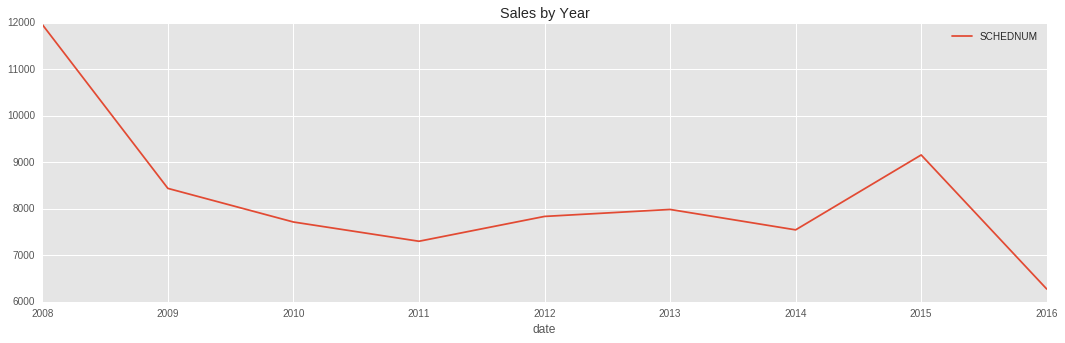

In [113]:
df_yearly_sales = df_merge[['SCHEDNUM']].resample('A').count()

axis = df_yearly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Year")

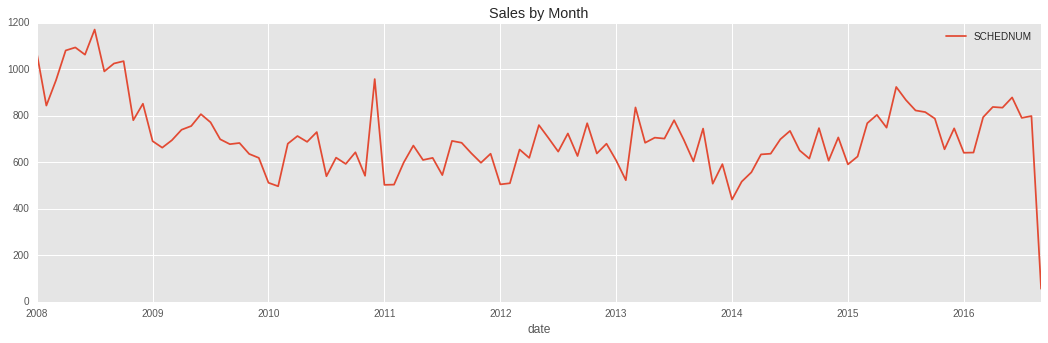

In [114]:
df_monthly_sales = df_merge[['SCHEDNUM']].resample('M').count()

axis = df_monthly_sales.plot(figsize=(18, 5));

axis.set_title("Sales by Month")

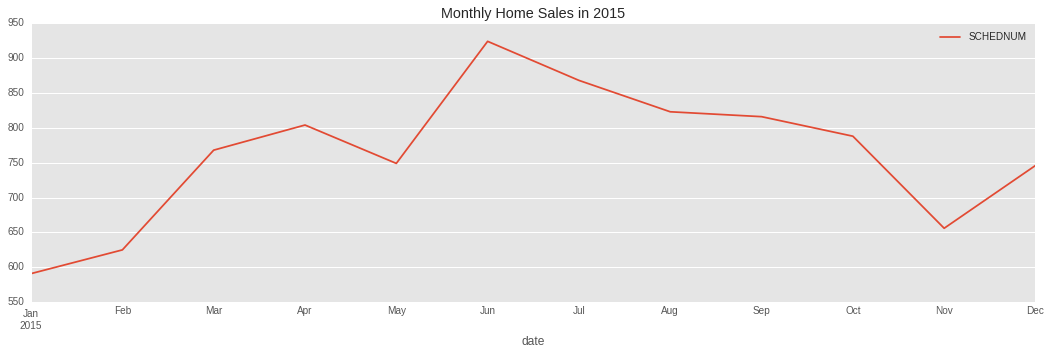

In [117]:
sales_in_2015 = df_merge[['SCHEDNUM']][(df_merge.year == 2015)].resample('M').count()

axis = sales_in_2015.plot(figsize=(18,5));

axis.set_title("Monthly Home Sales in 2015")

In [53]:
df_wd = df_merge[df_merge.INSTRUMENT == 'WD']

In [54]:
df_wd.shape

(34386, 125)

In [71]:
df_wd.groupby('SALE_YEAR').count()

,SCHEDNUM,RECEPTION_NUM,INSTRUMENT,SALE_MONTHDAY,RECEPTION_DATE,SALE_PRICE,GRANTOR,GRANTEE,CLASS,MKT_CLUS,...,ASMT_APPR_LAND,TOTAL_VALUE,ASDLAND,ASSESS_VALUE,ASMT_TAXABLE,ASMT_EXEMPT_AMT,NBHD_1_y,NBHD_1_CN_y,LEGL_DESCRIPTION,datetime
SALE_YEAR,,,,,,,,,,,,,,,,,,,,,
2008,3764,3764,3764,3764,3764,3386,3764,3764,3764,3764,...,3764,3764,3764,3764,3764,3764,3764,3764,3764,3764
2009,3343,3343,3343,3343,3343,3084,3343,3343,3343,3342,...,3343,3343,3343,3343,3343,3343,3343,3343,3343,3343
2010,2796,2796,2796,2796,2796,2502,2796,2796,2796,2796,...,2796,2796,2796,2796,2796,2796,2796,2796,2796,2796
2011,2800,2800,2800,2800,2800,2464,2800,2800,2800,2800,...,2799,2799,2799,2799,2799,2799,2799,2799,2799,2800
2012,3455,3455,3455,3455,3455,3097,3455,3455,3455,3455,...,3455,3455,3455,3455,3455,3455,3455,3455,3455,3455
2013,4183,4183,4183,4183,4183,3916,4183,4183,4183,4183,...,4183,4183,4183,4183,4183,4183,4183,4183,4183,4183
2014,4478,4478,4478,4478,4478,4332,4478,4478,4478,4478,...,4476,4476,4476,4476,4476,4476,4476,4476,4476,4478
2015,5565,5565,5565,5565,5565,5434,5565,5565,5565,5565,...,5558,5558,5558,5558,5558,5558,5558,5558,5558,5565
2016,4002,4002,4002,4002,4002,3889,4002,4002,4002,3999,...,3997,3997,3997,3997,3997,3997,3997,3997,3997,4002


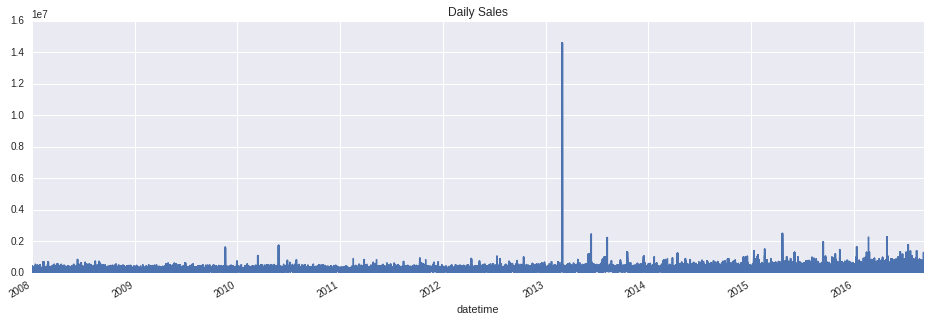

In [77]:
axis = df_wd.SALE_PRICE.plot(figsize=(16, 5))

axis.set_title("Daily Sales");

In [ ]:
s